# Car Auctions Analysis

You can write the explanation here

## Import libraries


In [58]:
# Import the libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np

## Load the data frame

In [59]:
# Load the car sales data into a data frame.
ruta_archivo ='C:/Users/linco/OneDrive/Documents/Trabajo/vehiculos/data/car_prices.csv'
df = pd.read_csv(ruta_archivo, on_bad_lines='skip')

## Explaore the data

In [60]:

# Display the first few records of the data frame.
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [61]:
# Show the shape of the data frame.
df.shape

(558811, 16)

In [62]:
col = df.columns
print(col)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [63]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [64]:
df.nunique(axis=0)

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [65]:
df.condition.unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [67]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

## Visualizacion de distribuccion de datos

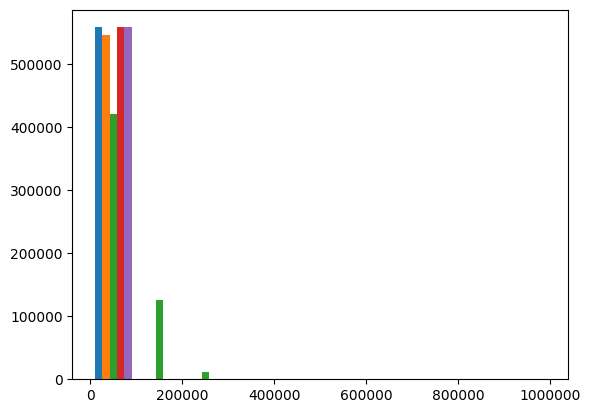

In [68]:

plt.hist(df[['year','condition','odometer','mmr','sellingprice']],alpha = 1)
plt.ticklabel_format(style='plain', axis='x')

## cleaning of null values in it dataser

In [69]:

df_cleaned = df.dropna(axis = 0)
df_cleaned.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [70]:
df_cleaned.shape

(472336, 16)

## correlation matrix

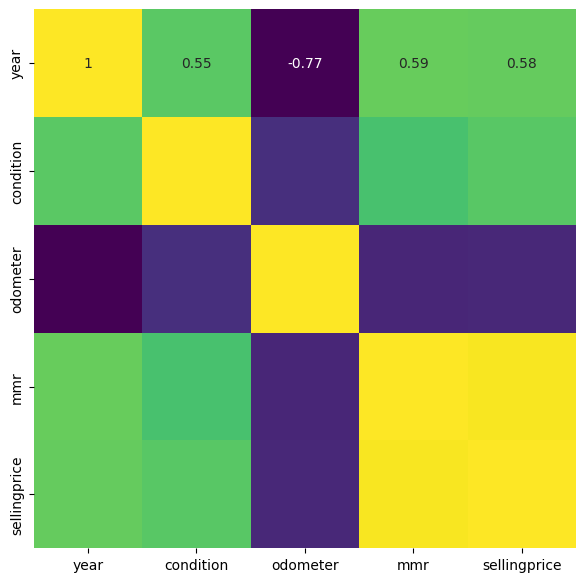

In [71]:
correlation = df_cleaned[['year','condition','odometer','mmr','sellingprice']].corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels= correlation.columns, annot=True,cmap = 'viridis',cbar=False)
plt.show()

## scatter plot

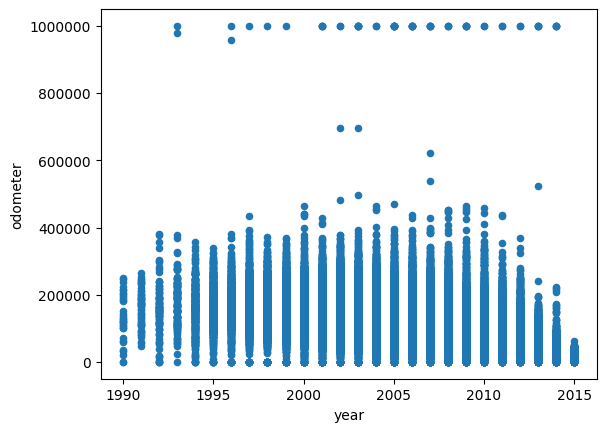

In [72]:
df_cleaned.plot(x='year', y = 'odometer', kind = 'scatter')
plt.ticklabel_format(style='plain', axis='y')

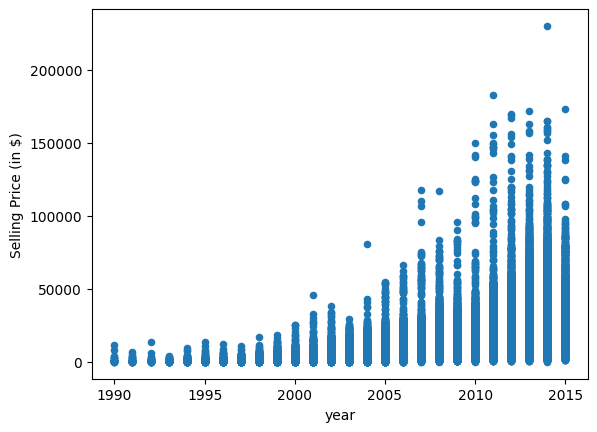

In [73]:
df_cleaned.plot(x = 'year', y = 'sellingprice', kind = 'scatter')
plt.xlabel('year')
plt.ylabel('Selling Price (in $)')
plt.show()

## all scatter plots

c:\Users\linco\anaconda3\envs\dhgoodall_python311_20231010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\linco\anaconda3\envs\dhgoodall_python311_20231010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\linco\anaconda3\envs\dhgoodall_python311_20231010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\linco\anaconda3\envs\dhgoodall_python311_20231010\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

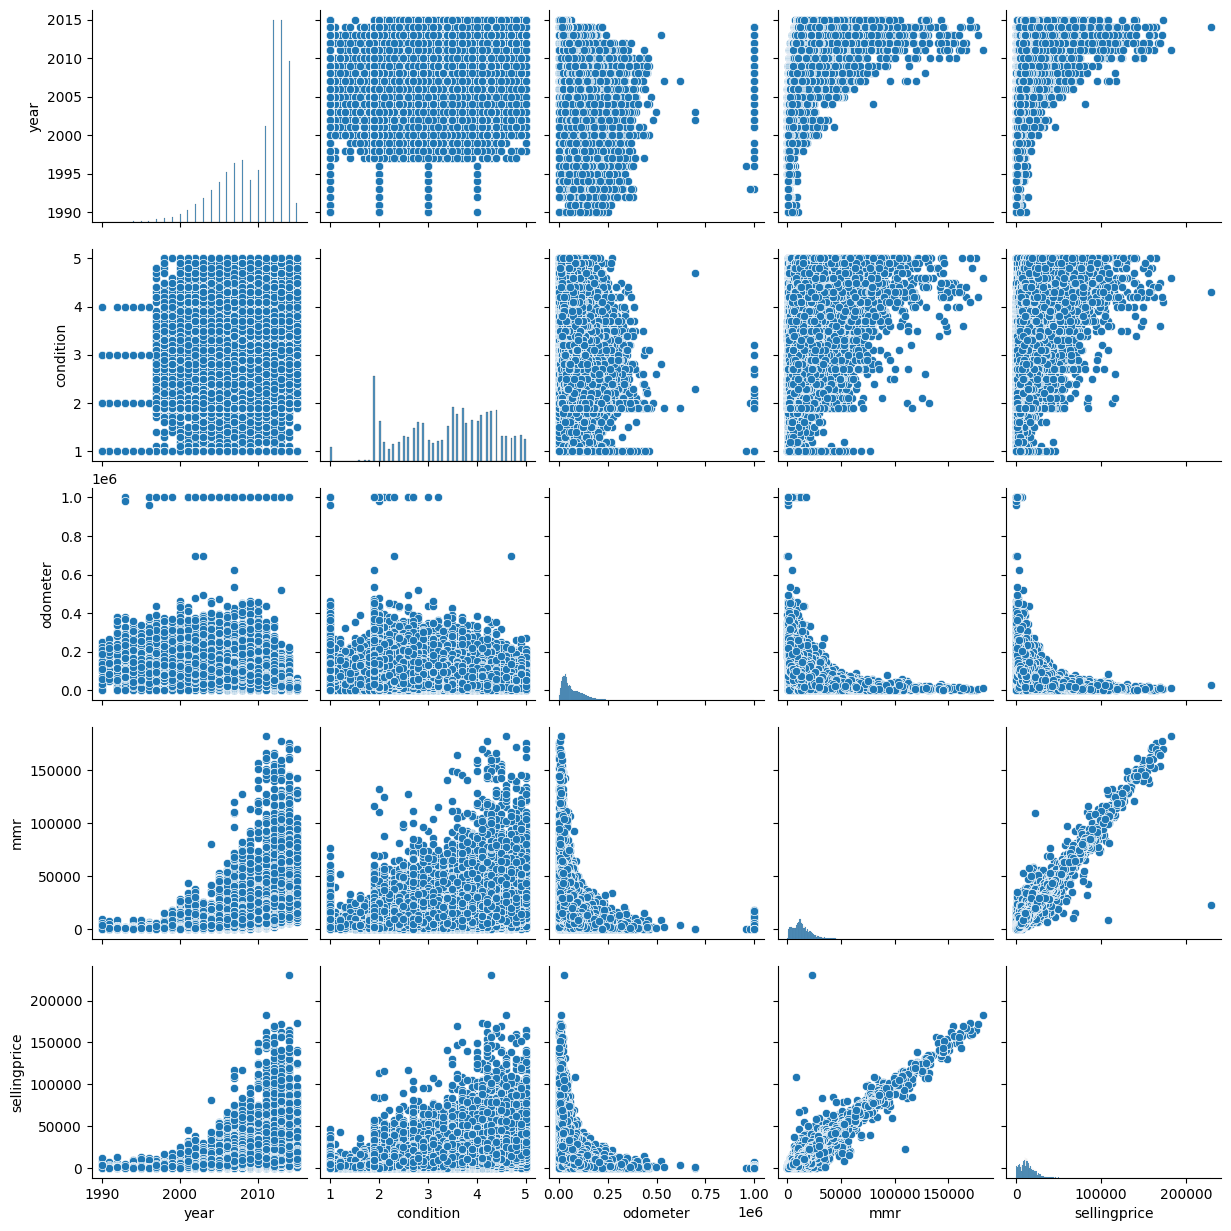

In [74]:
sns.pairplot(df_cleaned)

## histogram with clean databases

Text(0.5, 0, 'Years')

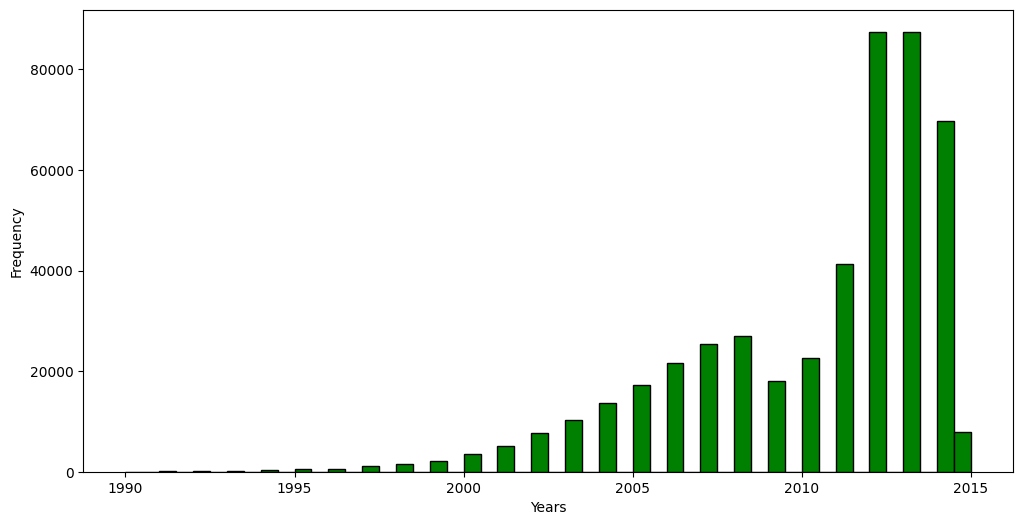

In [75]:
df_cleaned['year'].plot(kind= 'hist', bins = 50, figsize=(12, 6),facecolor='green', edgecolor = 'black')
plt.xlabel('Years')


Text(0.5, 0, 'Condition')

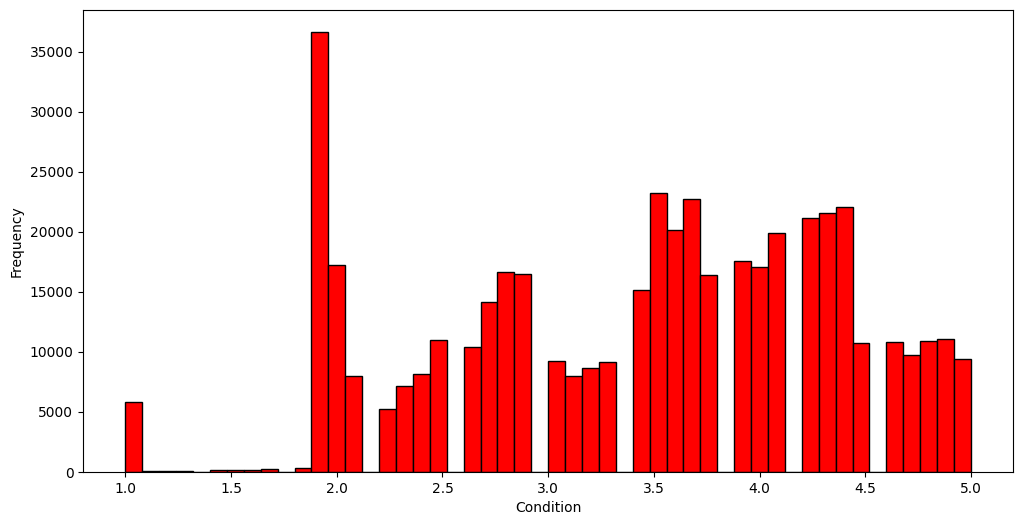

In [76]:
df_cleaned['condition'].plot(kind= 'hist', bins = 50, figsize=(12, 6), facecolor='red', edgecolor = 'black')
plt.xlabel('Condition')

Text(0.5, 0, 'Odometer')

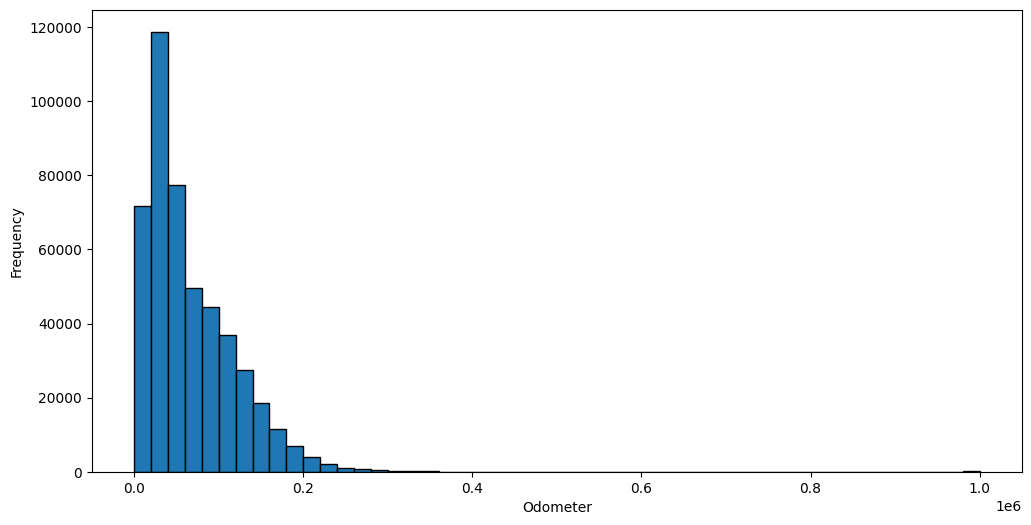

In [77]:
df_cleaned['odometer'].plot(kind= 'hist', bins = 50, figsize=(12, 6), edgecolor = 'black')
plt.xlabel('Odometer')

Text(0.5, 0, 'Mmr')

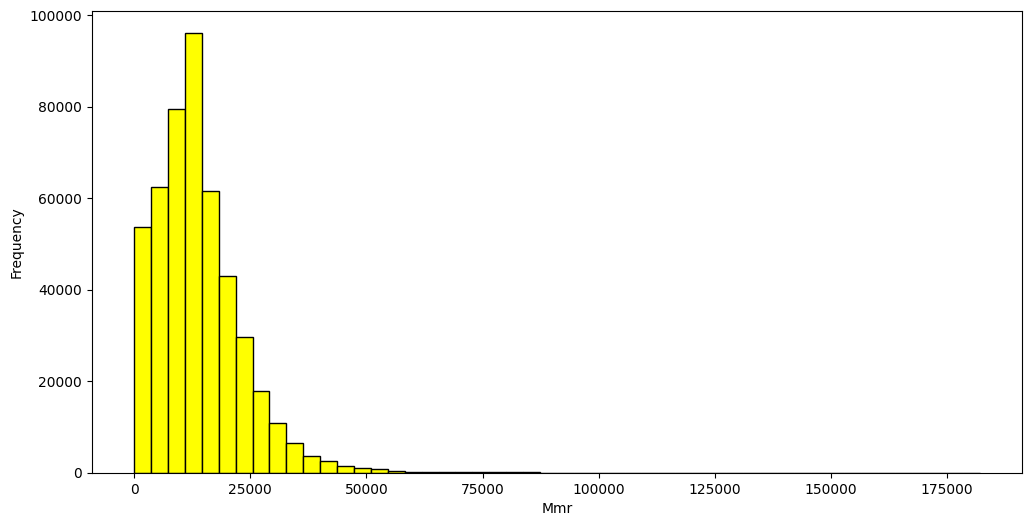

In [78]:
df_cleaned['mmr'].plot(kind= 'hist', bins = 50, figsize=(12, 6), facecolor='yellow', edgecolor = 'black')
plt.xlabel('Mmr')

Text(0.5, 0, 'SellingPrice')

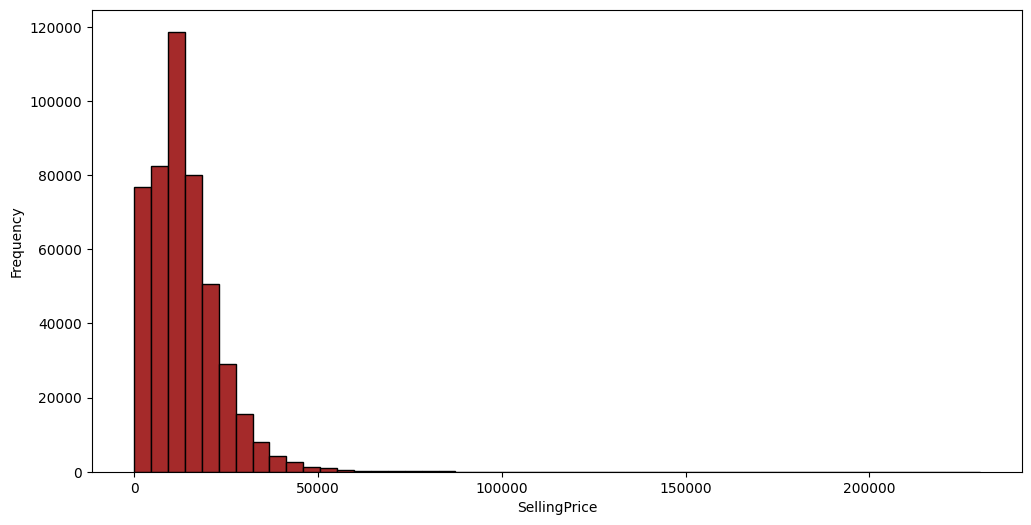

In [79]:
df_cleaned['sellingprice'].plot(kind= 'hist', bins = 50, figsize=(12, 6), facecolor='brown', edgecolor = 'black')
plt.xlabel('SellingPrice')

<Axes: >

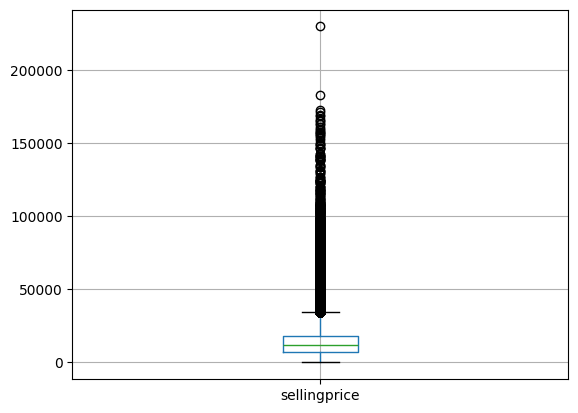

In [83]:
df_cleaned.boxplot('sellingprice')